<a href="https://colab.research.google.com/github/danpele/Stat_fin_markets/blob/master/SFM_returns/SFM_returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install yfinance
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 7.7 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting un

In [2]:
import yfinance as yf

import numpy as np
import pandas as pd
#define the ticker symbol
tickerSymbol = 'MSFT'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
df = tickerData.history(period='1d', start='2020-1-1', end='2023-03-10')

#see your data
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,153.977482,155.868499,153.541096,155.761826,22622100,0.0,0.0
2020-01-03 00:00:00-05:00,153.531351,155.112039,153.279206,153.822266,21116200,0.0,0.0
2020-01-06 00:00:00-05:00,152.328878,154.287784,151.776112,154.219894,20813700,0.0,0.0
2020-01-07 00:00:00-05:00,154.501128,154.840532,152.561621,152.813751,21634100,0.0,0.0
2020-01-08 00:00:00-05:00,154.122916,155.936365,153.172561,155.247833,27746500,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-03 00:00:00-05:00,252.190002,255.619995,251.389999,255.289993,30741300,0.0,0.0
2023-03-06 00:00:00-05:00,256.429993,260.119995,255.979996,256.869995,24109800,0.0,0.0
2023-03-07 00:00:00-05:00,256.299988,257.690002,253.389999,254.149994,21473200,0.0,0.0



Simple return: $R_t=\frac{P_t - P_{t-1}}{P_{t-1}}$

Log-return: $r_t = \log\left(\frac{P_t}{P_{t-1}}\right)=\log{P_t}-\log{P_{t-1}}$

In [3]:
close = df["Close"]

simple_return = close.pct_change()

log_return = np.log(1+simple_return)


In [4]:
log_return

Date
2020-01-02 00:00:00-05:00         NaN
2020-01-03 00:00:00-05:00   -0.012530
2020-01-06 00:00:00-05:00    0.002582
2020-01-07 00:00:00-05:00   -0.009160
2020-01-08 00:00:00-05:00    0.015803
                               ...   
2023-03-03 00:00:00-05:00    0.016509
2023-03-06 00:00:00-05:00    0.006170
2023-03-07 00:00:00-05:00   -0.010645
2023-03-08 00:00:00-05:00   -0.001772
2023-03-09 00:00:00-05:00   -0.005454
Name: Close, Length: 802, dtype: float64

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:xlabel='Date'>

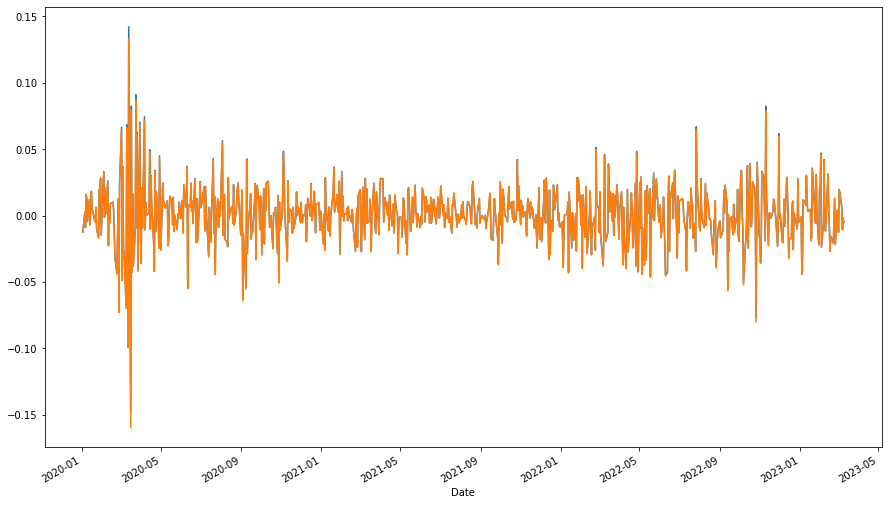

In [5]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline

pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

#apple["Adj. Close"].plot(grid = False) # Plot the adjusted closing price of AAPL

simple_return.plot()# Plot the lsimple return
log_return.plot() # Plot the logreturn

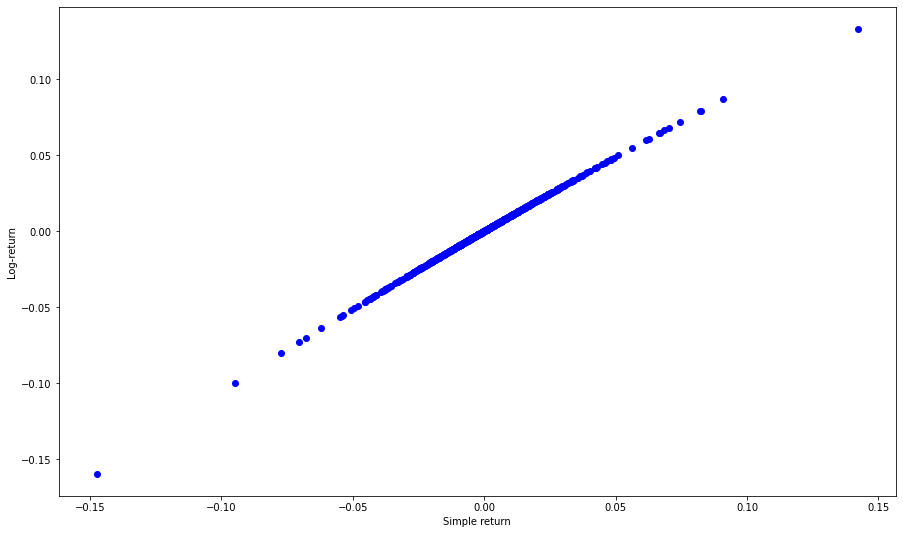

In [6]:
plt.plot(simple_return,log_return, 'o',c='blue')
plt.ylabel( 'Log-return' )
plt.xlabel( 'Simple return' )
#plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True)
plt.show()

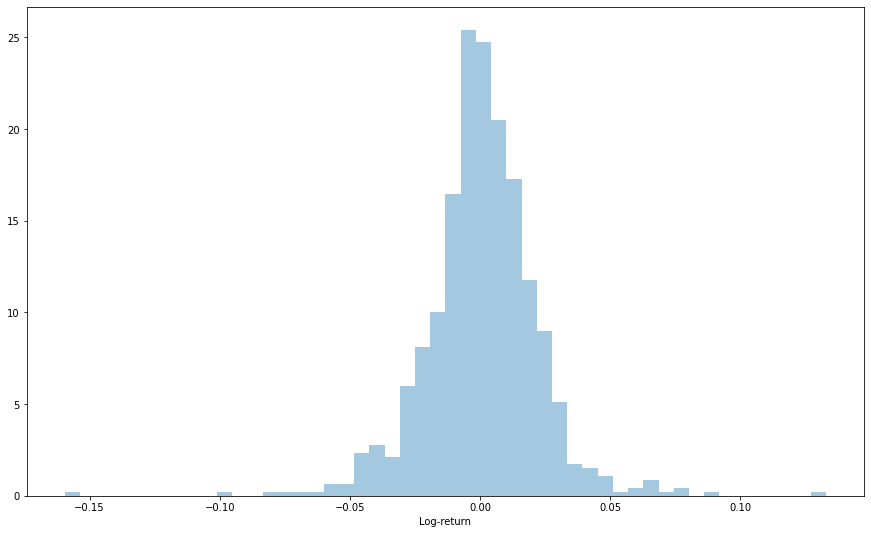

In [12]:
import seaborn as sns

# histogram

sns.distplot(log_return, kde=False, norm_hist=True,label='Log-returns',axlabel="Log-return") 
#sns.distplot(simple_return, kde=False, norm_hist=True, label='Simple returns')  


# plt.tight_layout()
# plt.savefig('images/ch1_im10.png')
plt.show()

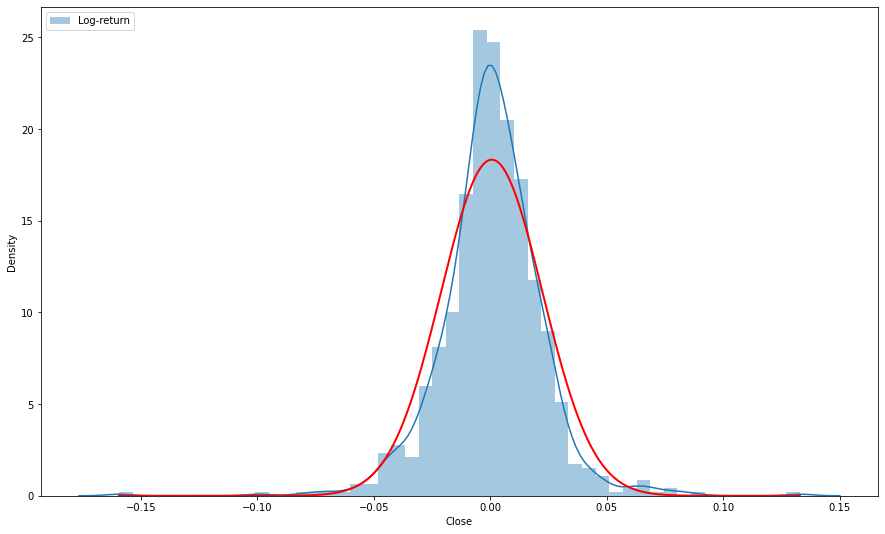

In [18]:
import seaborn as sns
import scipy
# histogram
ax = sns.distplot(log_return, kde=True, norm_hist=True, label="Log-return")

#sns.distplot(simple_return, kde=False, norm_hist=True, label='Simple returns')  
x_pdf = np.linspace(np.min(log_return), np.max(log_return), 1000)
mu=np.mean(log_return)
std=np.std(log_return)
y_pdf = scipy.stats.norm.pdf(x_pdf,mu,std)
legend(loc='upper left');
ax.plot(x_pdf, y_pdf, 'r', lw=2, label='Normal pdf')  
# plt.tight_layout()
# plt.savefig('images/ch1_im10.png')
plt.show()

In [19]:
log_return.describe()

count    801.000000
mean       0.000602
std        0.021780
min       -0.159453
25%       -0.009772
50%        0.000678
75%        0.012236
max        0.132929
Name: Close, dtype: float64

In [20]:
log_return=log_return.dropna()

In [24]:
import scipy
from scipy.stats import skew, kurtosis
print("Skewness: "+str(skew(log_return)))

Skewness: -0.2639542121283528


In [27]:
print("Kurtosis: " +str(kurtosis(log_return,fisher =  False)))

Kurtosis: 9.563463462932765
